#                                 _Google Play Store - Analysis Dashboard_

Mobile apps are everywhere.They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed.So,here is comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories.
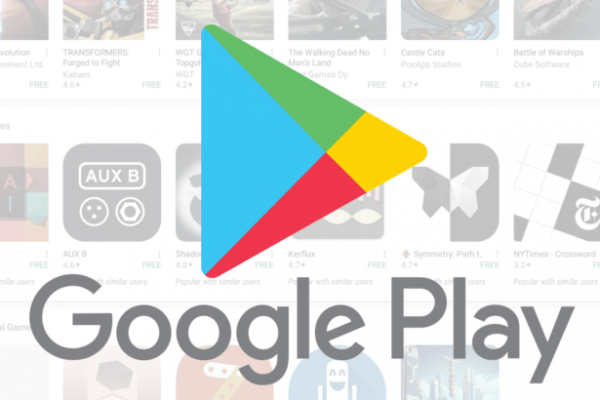


In [1]:
#Read datasets
import pandas as pd
apps=pd.read_csv("apps.csv")

#Remove duplicates first
apps_data=apps.drop_duplicates()

#List of characters to remove
char_remove=['+','$',',']

#List of col to clean
col_clean=["Installs","Price"]

#Loop for each columns
for col in col_clean:
    
    #Loop for removing character
    for char in char_remove:
        apps_data[col]=apps_data[col].astype(str).str.replace(char,'')
        
    #convert col into numeric
    apps_data[col]=pd.to_numeric(apps_data[col])
    
    apps_data.dropna(inplace=True,subset=['Current Ver','Android Ver'])

apps_data['Rating'].fillna(0,inplace=True)

# Rating without zero
Rating_without_zero = apps_data[apps_data['Rating'] != 0 ]


#See app categories
#print number of categories
len(apps_data["Category"].unique())

#count the number of apps in each category and set into descending order
num_apps_in_category = apps_data["Category"].value_counts().sort_values(ascending=False)


FileNotFoundError: [Errno 2] File apps.csv does not exist: 'apps.csv'

# _**Apps Category**_

On google play store,There are multiple number of apps which are divided into different categories.So lets have a first look on it.

In [ ]:
#import plotly for making interactive graph of category
import plotly as py

import plotly.graph_objs as go

# importing libraries
from plotly.offline import init_notebook_mode

# To establish connection 
init_notebook_mode(connected=False)

data =[go.Bar(
        x = num_apps_in_category.index,  # index = category name
        y = num_apps_in_category.values  # value = count
)]
py.offline.iplot(data)

**Notice** that Family,Game,Tool these categories have more apps in google play as compared to others.That means most of the  **Appliction Developer** prefer to make these three categories.


But its Developer preferences,now its time to see the **customer** preferences that which first three categories customers most like to install or download. 

In [ ]:
trys=apps_data.groupby('Category')['Installs'].sum().sort_values(ascending=False)
trys
data2 =[go.Bar(
        x = trys.index,  # index = category name
        y = trys.values  # value = count
)]

py.offline.iplot(data2)

**Customer** mostly like to install these categories apps- Game,Communication,Tools,Productivity,Social

# Rating of apps

 Rating tells us the popularity of apps and also shows the user interest.
 Lets have a look on Distribution of average rating.
 
 #### The average rating = 4.173321123321124

In [ ]:
# Mean of rating
avg_app_rating=Rating_without_zero['Rating'].mean()

# Make histrogram to see distribution of app rating
data=[go.Histogram(x=Rating_without_zero["Rating"])]

# vertical line indicate the avg rating 
layout={'shapes': 
        [
            {
                'type':'line', 'x0':avg_app_rating, 'y0':0, 'x1':avg_app_rating, 'y1':1000, 'line': {'dash':'dashdot'}
            }
        ]
       }
py.offline.iplot({'data':data,'layout':layout})

**Size** and **Price** is considerable factor of the apps for user.
Now let see that the size and price of app effects its rating or not .

In [ ]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# take data without null values
apps_data_Rating_Size_present = apps_data[ (~Rating_without_zero["Rating"].isnull()) & (~apps_data["Size"].isnull()) ]

large_categories = apps_data_Rating_Size_present.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex')

# choose a paid values in type column 
paid_apps= apps_data_Rating_Size_present[apps_data_Rating_Size_present['Type']=='Paid']

#see relation between price and rating
plt2=sns.jointplot(x=paid_apps['Price'],y=paid_apps['Rating'])


From the above ,the size of apps is somewhere effects the rating of apps.But price of apps is definitely effects rating.

Also its good to see the content rating that means which age group or everyone visits or uses a apps of google play.
Lets have look on content rating .

In [ ]:
import matplotlib.pyplot as plt
df=apps_data['Content Rating'].value_counts()
df=df.reset_index()

plt.figure(figsize=(8,6))
sns.set_style('ticks')
sns.barplot(x=df['Content Rating'],y=df['index'],alpha=0.7,orient='h')

#plt.bar(x=df['index'],height=df['Content Rating'],alpha=0.7,width=0.7,color='blue')

for i, v in enumerate(df['Content Rating']):
        plt.text(v + 3, i + .25, str(v), color='blue',fontsize=11)

plt.title("Showing value of content rating",fontsize=18,color='blue')
plt.xticks(rotation=-60,fontsize=14,color='blue')
plt.yticks(fontsize=14,color='blue')
plt.xlabel("")
plt.ylabel("")


plt.show()

From above its clear that mostly every age group uses a google play.

# Genres of apps

Genres describe the style,fuctions and features of apps that distinguish them from one another.

In [ ]:
df=apps_data['Genres'].value_counts()
df=df.reset_index()
df = df[df['Genres'] > 100]
plt.figure(figsize=(6,9))
plt1=sns.barplot(x=df['Genres'],y=df['index'],alpha=0.7,orient='h')

for i, v in enumerate(df['Genres']):
        plt.text(v+3,i,str(v),fontsize=10,fontweight='bold')

plt.title("Genres",Fontsize=16) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Freq',fontsize=14)
plt.xlabel('Genres',fontsize=14)

plt.show();


# Apps Updation

There are around _**801**_ apps that are not been updated since 2 years,these apps might not be in service.

In [ ]:
d=pd.DatetimeIndex(apps_data['Last Updated'])
apps_data['year']=d.year
apps_data['month']=d.month

app_data_with_no_updated=apps_data[apps_data['year']<2016]
app_data_with_no_updated_category=app_data_with_no_updated['Category'].value_counts()
app_data_with_no_updated_category

data=[go.Bar(
        x=app_data_with_no_updated_category.index,
        y=app_data_with_no_updated_category.values
)]

py.offline.iplot(data)

# Free v/s Paid apps

When we are talking about apps, there one thing that always hit into user inbox that is- app is paid or free?Let see.

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
size=[8856,753]
name=['Free','Paid']
colors=['lightblue','pink']
explode=[0,0.01]


plt.pie(size,labels=name,
        colors=colors,
        startangle=180, autopct='%.1f%%',
       explode=explode,textprops={'fontsize': 14} )


plt.title('% Free vs Paid Apps',fontsize=19)
plt.show()

### See distribution of paid and free apps.

In [ ]:
paided_apps = apps_data[apps_data['Type']=='Paid']

paided_apps_with_categories = paided_apps['Category'].value_counts()

paided_apps_with_categories=paided_apps_with_categories.reset_index()

paided_apps_with_categories=paided_apps_with_categories[:10]

plt.figure(figsize=(9,7))

plt3=plt.pie( x= list(paided_apps_with_categories['Category']),
        labels= list(paided_apps_with_categories['index']),
        autopct='%1.0f%%',
        pctdistance=0.8,
        labeldistance=1.1,textprops={'fontsize': 14})

plt.title('% Distribution of Paided Apps Categories',fontsize=20,color="blue")



free_apps = apps_data[apps_data['Type']=='Free']

free_apps_with_categories = free_apps['Category'].value_counts()

free_apps_with_categories=free_apps_with_categories.reset_index()

free_apps_with_categories=free_apps_with_categories[:10]

plt.figure(figsize=(9,7))

plt.pie(x=list(free_apps_with_categories['Category']),
        labels=list(free_apps_with_categories['index']),
        autopct='%1.0f%%',
        pctdistance=0.8,
        labeldistance=1.1,textprops={'fontsize': 14})


plt4=plt.title('% Distribution of free Apps Categories',fontsize=20,color="blue")

That is obvious that people more prefer free apps instead of paid ones.According to below graph:                             
1. Paid apps maximum installs=_**10M**_
2. Free apps maximum installs=_**10B**_

In [ ]:
paid_apps_with_installs=go.Box(
    
    y=apps_data[apps_data['Type']=='Paid']['Installs'],
             name='Paid')

free_apps_with_installs=go.Box(
    
    y=apps_data[apps_data['Type']=='Free']['Installs'],
         name='Free')

layout=go.Layout(
    title="Number of installs of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    ))

data= [paid_apps_with_installs,free_apps_with_installs]

py.offline.iplot({'data': data, 'layout': layout})

#  Sentiment analysis of User Reviews 

Reviews explain the feedback of apps or can say user point of view about that apps.It can be positive,negative or neutral.From reviews, Developer can understand the user requirements or user expection for specific app and then update that app according to user preferences.See a sentiment of reviews..


In [ ]:
reviews_data=pd.read_csv("user_reviews.csv")
reviews_data.dropna(inplace=True)
reviews_data_sentiment_count=reviews_data['Sentiment'].value_counts()

plt.title("Bar Plot Sentiment of reviews",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Sentiment_Freq",fontsize=12)
        
plt5=plt.bar(x=reviews_data_sentiment_count.index,
            height=reviews_data_sentiment_count.values,
           color='b')



Moslty user give positive reviews.


By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of negative comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative. 

This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average.

In [ ]:
both_data_merge=pd.merge(apps_data,reviews_data,on='App',how='inner')
plt.figure(figsize=(7,8))
plt.title("Sentiment Polarity Distribution",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("Type",fontsize=14)
plt.ylabel("Sentiment_Polarity",fontsize=14)
plt6=sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = both_data_merge,color="blue")

## Notebook Covers:

1. Categories of apps
2. Rating of apps(Size,Price v/s Rating)
3. Genres and updation of apps
4. Free v/s Paid apps
5. Sentiment analysis of User Reviews

## Summary

1. Developers making more family apps but user prefer to use more game apps.
2. Price of apps effect the apps rating.
3. Some of apps are not in service because they are not been updated since 2 years.
4. Free apps are most popular as compared to paid apps.
5. From sentiment analysis,its clear that quality of paid apps is high as compared to free apps  .

## For info of dataset
Visit [Kaggle](https://www.kaggle.com/lava18/google-play-store-apps?select=googleplaystore.csv) wesite.